In [1]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import csv
import sys
sys.path.append("..")

from Code.VQLSSVM import VQLSSVM
from Code.Utils import prepareDataset

np.set_printoptions(precision=4, suppress=True)

In [2]:
qubits = 3
shots: int = 10000
gamma: float = 0.01 # regularization parameter
subsetSize: int = 2**qubits - 1 # number of training points
classToFilterOut: int = 2

In [3]:
xTrain, xTest, yTrain, yTest = prepareDataset(normalizeValues=True, dataset="breastCancer",subsetSize=subsetSize, classToFilterOut=classToFilterOut)
print(xTrain)
print(yTrain)

[[ 0.2134 -0.1985  0.1873 -0.0783 -0.2561 -0.3177 -0.4039 -0.1361  0.0444
  -0.7536 -0.3889 -0.635  -0.46   -0.5607 -0.6539 -0.5578 -0.826  -0.3514
  -0.688  -0.7823  0.2665 -0.1141  0.1942 -0.1035 -0.153  -0.4252 -0.4222
   0.2509 -0.4067 -0.6391]
 [-0.6839 -0.5509 -0.7026 -0.8461 -0.2469 -0.8125 -0.9526 -0.9454 -0.1667
  -0.4924 -0.9284 -0.7318 -0.9436 -0.977  -0.6347 -0.925  -0.9489 -0.7918
  -0.7828 -0.8818 -0.7638 -0.4803 -0.7937 -0.9018 -0.2428 -0.8814 -0.93
  -0.8364 -0.56   -0.7514]
 [-0.4293 -0.1539 -0.4718 -0.6752 -0.8216 -1.     -0.9925 -0.9816 -0.6616
  -0.8997 -0.9554 -0.6544 -0.9676 -0.9718 -0.8841 -1.     -0.9919 -0.9298
  -0.7679 -0.9949 -0.5681 -0.0938 -0.6238 -0.7918 -0.8669 -0.9864 -0.9873
  -0.9364 -0.7122 -0.9555]
 [-0.6726 -0.6111 -0.6845 -0.8421 -0.049  -0.6452 -0.9689 -0.8791 -0.2646
  -0.3875 -0.9422 -0.7602 -0.9575 -0.9811 -0.6737 -0.9127 -0.9858 -0.8116
  -0.7991 -0.8669 -0.7446 -0.5853 -0.7703 -0.8967 -0.1689 -0.8292 -0.9578
  -0.6932 -0.586  -0.6373]
 [-0.1

# VQLS-LSSVM state vectors

Condition number of the matrix:  4586.769581244039
LS-SVM Matrix:
 [[  0.       1.       1.       1.       1.       1.       1.       1.    ]
 [  1.     105.9061   7.2186   8.4348   7.1072   4.7027   6.5156   6.6811]
 [  1.       7.2186 117.7272  18.1796  17.3675   9.6367  17.6582   8.731 ]
 [  1.       8.4348  18.1796 120.5324  17.5564  10.0366  17.9439   9.727 ]
 [  1.       7.1072  17.3675  17.5564 117.1645   9.549   17.2814   8.7623]
 [  1.       4.7027   9.6367  10.0366   9.549  106.3332   9.5106   5.7548]
 [  1.       6.5156  17.6582  17.9439  17.2814   9.5106 117.9431   8.0205]
 [  1.       6.6811   8.731    9.727    8.7623   5.7548   8.0205 108.1244]]
['III', 'IIX', 'IIZ', 'IXI', 'IXX', 'IXZ', 'IYY', 'IZI', 'IZX', 'IZZ',
 'XII', 'XIX', 'XIZ', 'XXI', 'XXX', 'XXZ', 'XYY', 'XZI', 'XZX', 'XZZ',
 'YIY', 'YXY', 'YYI', 'YYX', 'YYZ', 'YZY', 'ZII', 'ZIX', 'ZIZ', 'ZXI',
 'ZXX', 'ZXZ', 'ZYY', 'ZZI', 'ZZX', 'ZZZ']
Pauli matrix coeffitients [(99.21637293840365+0j), (9.187274556177924+0j), (

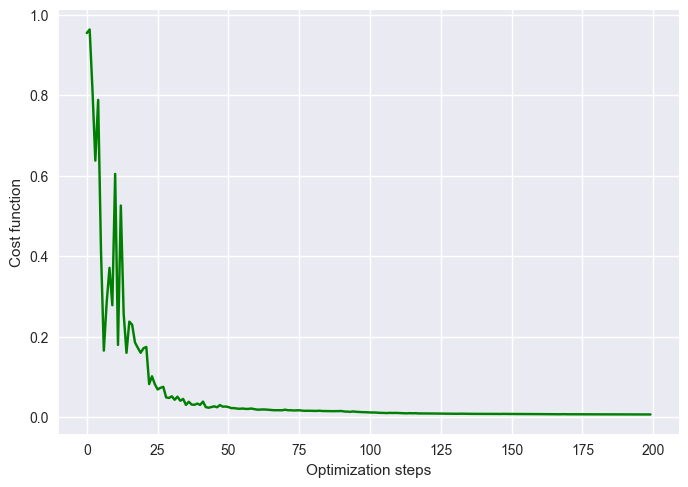

In [4]:
vqlssvmVectors: VQLSSVM = VQLSSVM(gamma, shots)
vqlssvmVectors.train(xTrain, yTrain, quantumSimulation=False, verbose=True, iterations = 200, method="COBYLA")
vqlssvmVectors.plotCost()

In [5]:
print(vqlssvmVectors.predict(xTest))

[ 0.2655+0.j  0.1654+0.j  0.251 +0.j  0.3162+0.j  0.3046+0.j  0.1133+0.j
  0.5305+0.j  0.1121+0.j  0.1818+0.j  0.0973+0.j -0.0028+0.j  0.4422+0.j
  0.4921+0.j  0.061 +0.j -0.5297+0.j  0.1191+0.j  0.3402+0.j  0.2992+0.j
  0.204 +0.j  0.3639+0.j -0.1795+0.j  0.2074+0.j -0.2379+0.j  0.3456+0.j
  0.2028+0.j  0.3429+0.j  0.3019+0.j  0.105 +0.j -0.1738+0.j  0.2227+0.j
  0.1631+0.j  0.0233+0.j -0.1703+0.j  0.239 +0.j -0.0489+0.j  0.2179+0.j
  0.2226+0.j  0.2474+0.j  0.2589+0.j  0.0607+0.j  0.4065+0.j  0.0737+0.j
  0.1421+0.j  0.2679+0.j  0.2067+0.j  0.1388+0.j -0.0512+0.j -0.1211+0.j
 -0.0603+0.j  0.293 +0.j -0.2911+0.j  0.058 +0.j  0.1918+0.j  0.4211+0.j
  0.4797+0.j -0.1468+0.j  0.1895+0.j  0.1114+0.j -0.0073+0.j  0.2241+0.j
  0.1565+0.j  0.275 +0.j  0.3336+0.j -0.2284+0.j  0.1012+0.j  0.3524+0.j
  0.332 +0.j -0.1287+0.j  0.3831+0.j  0.2241+0.j  0.0444+0.j -0.1346+0.j
  0.3857+0.j  0.4284+0.j  0.2871+0.j -0.2335+0.j  0.227 +0.j  0.2083+0.j
  0.1309+0.j  0.2233+0.j -0.4572+0.j  0.0768+0.j -0

In [6]:
print("Accuracy:",vqlssvmVectors.accuracy(xTest, yTest))

Accuracy: 0.6245551601423488


# VQLS-LSSVM quantum

Condition number of the matrix:  4586.769581244039
LS-SVM Matrix:
 [[  0.       1.       1.       1.       1.       1.       1.       1.    ]
 [  1.     105.9061   7.2186   8.4348   7.1072   4.7027   6.5156   6.6811]
 [  1.       7.2186 117.7272  18.1796  17.3675   9.6367  17.6582   8.731 ]
 [  1.       8.4348  18.1796 120.5324  17.5564  10.0366  17.9439   9.727 ]
 [  1.       7.1072  17.3675  17.5564 117.1645   9.549   17.2814   8.7623]
 [  1.       4.7027   9.6367  10.0366   9.549  106.3332   9.5106   5.7548]
 [  1.       6.5156  17.6582  17.9439  17.2814   9.5106 117.9431   8.0205]
 [  1.       6.6811   8.731    9.727    8.7623   5.7548   8.0205 108.1244]]
['III', 'IIX', 'IIZ', 'IXI', 'IXX', 'IXZ', 'IYY', 'IZI', 'IZX', 'IZZ',
 'XII', 'XIX', 'XIZ', 'XXI', 'XXX', 'XXZ', 'XYY', 'XZI', 'XZX', 'XZZ',
 'YIY', 'YXY', 'YYI', 'YYX', 'YYZ', 'YZY', 'ZII', 'ZIX', 'ZIZ', 'ZXI',
 'ZXX', 'ZXZ', 'ZYY', 'ZZI', 'ZZX', 'ZZZ']
Pauli matrix coeffitients [(99.21637293840365+0j), (9.187274556177924+0j), (

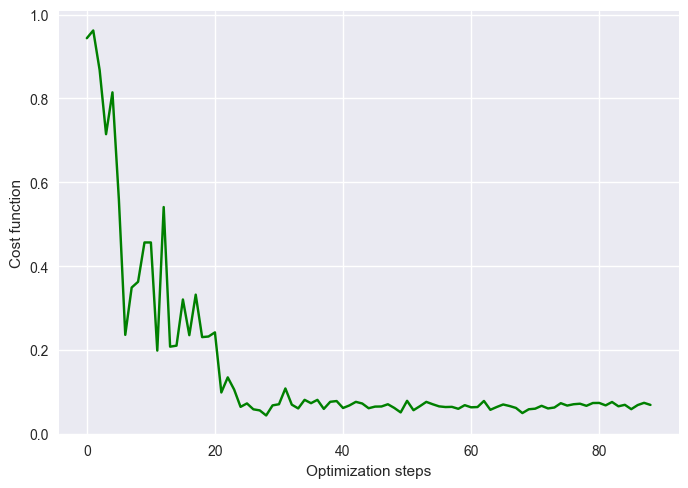

In [7]:
vqlssvmQuantum: VQLSSVM = VQLSSVM(gamma, shots)
vqlssvmQuantum.train(xTrain, yTrain, quantumSimulation=True, verbose=True, iterations = 200, threads=4, jobs=10, circuitConstructionThreading=True)

vqlssvmQuantum.plotCost()

In [8]:
costCOBYLA = vqlssvmQuantum.getCostHistory()

with open('../SimulationResults/costCOBYLA.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    writer.writerow(['Iteration', 'CostFunction'])
    for i in range(len(costCOBYLA)):
        writer.writerow([i, costCOBYLA[i]])


In [9]:
print("Predictions:\n", vqlssvmQuantum.predict(xTest))
print("Accuracy: ", vqlssvmQuantum.accuracy(xTest, yTest))

Predictions:
 [ 0.2298+0.j  0.2985+0.j  0.1345+0.j  0.0098+0.j  0.1586+0.j  0.3945+0.j
  0.0932+0.j  0.0742+0.j  0.3276+0.j  0.3397+0.j  0.308 +0.j  0.0736+0.j
  0.0986+0.j  0.166 +0.j  0.3537+0.j  0.2561+0.j  0.175 +0.j  0.0901+0.j
  0.2676+0.j  0.1844+0.j  0.3198+0.j  0.2115+0.j  0.2952+0.j  0.2752+0.j
  0.088 +0.j  0.2486+0.j  0.2129+0.j  0.3862+0.j  0.4386+0.j  0.2296+0.j
  0.3723+0.j  0.3018+0.j  0.1705+0.j  0.2524+0.j  0.3628+0.j  0.2186+0.j
  0.2786+0.j  0.2425+0.j  0.3049+0.j  0.1625+0.j  0.1537+0.j  0.0733+0.j
  0.3512+0.j  0.1928+0.j  0.3219+0.j  0.3279+0.j  0.1383+0.j  0.233 +0.j
  0.3648+0.j  0.3   +0.j  0.4066+0.j  0.1862+0.j  0.1973+0.j -0.048 +0.j
  0.1057+0.j  0.3765+0.j  0.1012+0.j  0.3367+0.j  0.305 +0.j  0.2484+0.j
  0.3947+0.j  0.1552+0.j  0.2141+0.j  0.4112+0.j  0.3231+0.j  0.2429+0.j
  0.1917+0.j  0.2585+0.j  0.1319+0.j  0.1884+0.j  0.3503+0.j  0.3161+0.j
 -0.1447+0.j  0.0563+0.j  0.2094+0.j  0.3039+0.j  0.1904+0.j  0.3266+0.j
  0.3511+0.j  0.1327+0.j  0.406 +0.j 

# Classical SVM

In [10]:
clf = SVC(kernel='linear')
clf.fit(xTrain, yTrain)
yPred = clf.predict(xTest)
print("Accuracy:", accuracy_score(yTest, yPred))

Accuracy: 0.895017793594306
